In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/gdrive')

%cd /gdrive/My Drive/Machine learning/Data/

Mounted at /gdrive
/gdrive/My Drive/Machine learning/Data


### Data Dictionary:
- title : Title
- mediaType : Type of Anime
- eps : No. of episodes
- duration : Duration in minutes
- startYr : Start Year
- finishYr : Finish Year
- description : Description
- contentWarn : Content Waring
- watched : How many people have watched
- watching : How many people are watching
- rating : Rating
- votes : Votes
- studio_primary : Primary Studio
- studios_colab : IS there a colaboration with any other studio
- genre : Genre

In [ ]:

# Import the necessary libraries.
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


### Read the CSV input data file


In [ ]:
df=pd.read_csv("anime_ratings_data (2).csv")

In [ ]:

data = pd.read_csv("anime_ratings_data (2).csv")

### Create a shallow copy
* It is always better to create a shallow copy, so that the we need not read the file again and again (time consuming)

In [ ]:
df = data.copy()
df.head()

,title,mediaType,eps,duration,startYr,finishYr,description,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre
0,Dragon Ball Z Movie 15: Resurrection 'F',Movie,1,67.0,2015,2015,Even the complete obliteration of his physical...,No,4649,86,3.979,3100.0,Toei Animation,No,Other
1,Kuripuri*Kuripura,Movie,1,5.0,2008,2008,NaN,No,10,0,2.120,10.0,Others,No,Other
2,GJ-bu@,TV Special,1,46.0,2014,2014,The story is set during the spring vacation im...,No,1630,16,3.758,1103.0,Others,No,Other
3,Nausicaa of the Valley of the Wind,Movie,1,67.0,1984,1984,One thousand years after the Giant Warriors ca...,No,4649,184,4.444,3100.0,Others,No,Drama
4,Miru Tights Special,DVD Special,1,4.0,2019,2019,Yua is asked to model an illustrator's designs...,No,346,8,2.494,234.0,Others,No,Other


### Checking the shape

1.   columns
2.   Rows



In [ ]:
df.shape

(6523, 15)

### Checking the columns names

In [ ]:
df.columns

Index(['title', 'mediaType', 'eps', 'duration', 'startYr', 'finishYr',
       'description', 'contentWarn', 'watched', 'watching', 'rating', 'votes',
       'studio_primary', 'studios_colab', 'genre'],
      dtype='object')

### Using info and Describe on the df set

### Checking column type and missing values in df

In [ ]:
#getting all the information of dataset using info command
#info command gives
  #1 No of rows
  #2 No of columns
  #3 No of float,int,object columns
  #4 Datatype of all the columns
  #5 Notnull values of all the columns
  #6 Memory used for storing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6523 entries, 0 to 6522
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           6523 non-null   object 
 1   mediaType       6496 non-null   object 
 2   eps             6523 non-null   int64  
 3   duration        6248 non-null   float64
 4   startYr         6523 non-null   int64  
 5   finishYr        6523 non-null   int64  
 6   description     4114 non-null   object 
 7   contentWarn     6523 non-null   object 
 8   watched         6523 non-null   int64  
 9   watching        6523 non-null   int64  
 10  rating          6523 non-null   float64
 11  votes           6496 non-null   float64
 12  studio_primary  6523 non-null   object 
 13  studios_colab   6523 non-null   object 
 14  genre           6523 non-null   object 
dtypes: float64(3), int64(5), object(7)
memory usage: 764.5+ KB


In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
title,6523,6523,Dragon Ball Z Movie 15: Resurrection 'F',1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mediaType,6496,8,TV,2145,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eps,6523.0,NaN,NaN,NaN,8.716235,11.002479,1.0,1.0,1.0,12.0,34.0
duration,6248.0,NaN,NaN,NaN,18.396287,20.94935,1.0,5.0,7.0,25.0,67.0
startYr,6523.0,NaN,NaN,NaN,2005.241147,12.911035,1967.0,2000.0,2010.0,2015.0,2020.0
finishYr,6523.0,NaN,NaN,NaN,2005.575349,12.568169,1970.0,2000.0,2010.0,2015.0,2020.0
description,4114,4081,"In 19th century Belgium, in the Flanders count...",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contentWarn,6523,2,No,5825,NaN,NaN,NaN,NaN,NaN,NaN,NaN
watched,6523.0,NaN,NaN,NaN,1347.948643,1737.138112,5.0,56.0,349.0,2252.5,4649.0
watching,6523.0,NaN,NaN,NaN,57.445654,76.527405,0.0,2.0,13.0,98.0,199.0



*   Here we replace spaces with underscore
*   Title and description are ID columns drop them




In [ ]:
df.columns = [col.replace(' ','_') for col in df.columns]

In [ ]:
df=df.drop(["title","description"],axis=1)

## checking unique values

In [ ]:
df.nunique()

mediaType            8
eps                 34
duration            88
startYr             54
finishYr            51
contentWarn          2
watched           1912
watching           198
rating            2781
votes             1554
studio_primary      11
studios_colab        2
genre                9
dtype: int64

In [ ]:
df.isna().sum()

mediaType          27
eps                 0
duration          275
startYr             0
finishYr            0
contentWarn         0
watched             0
watching            0
rating              0
votes              27
studio_primary      0
studios_colab       0
genre               0
dtype: int64

### Observations:
- We can see that mediaType, duration and votes columns have missing values
- mediaType - We can replace with mode
- duration and votes can be replace by mean
- fill null values

In [ ]:
df['mediaType']=df['mediaType'].fillna(value =df['mediaType'].mode())
df['votes'] =df['votes'].fillna(value = df['votes'].mean())
df['duration'] =df['duration'].fillna(value = df['duration'].mean())

In [ ]:
mode_value = df['mediaType'].mode()[0]
df['mediaType'].fillna(mode_value,inplace=True)


*  Here after point 3 digit zero

In [ ]:
pd.set_option('display.float_format', lambda x : '%.3f' % x) # to display number in digits
df.describe(include = 'all').T

# Observations about Age, Gender, Maried, Average Losses


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
mediaType,6523,8,TV,2172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eps,6523.000,NaN,NaN,NaN,8.716,11.002,1.000,1.000,1.000,12.000,34.000
duration,6523.000,NaN,NaN,NaN,18.396,20.503,1.000,5.000,8.000,25.000,67.000
startYr,6523.000,NaN,NaN,NaN,2005.241,12.911,1967.000,2000.000,2010.000,2015.000,2020.000
finishYr,6523.000,NaN,NaN,NaN,2005.575,12.568,1970.000,2000.000,2010.000,2015.000,2020.000
contentWarn,6523,2,No,5825,NaN,NaN,NaN,NaN,NaN,NaN,NaN
watched,6523.000,NaN,NaN,NaN,1347.949,1737.138,5.000,56.000,349.000,2252.500,4649.000
watching,6523.000,NaN,NaN,NaN,57.446,76.527,0.000,2.000,13.000,98.000,199.000
rating,6523.000,NaN,NaN,NaN,2.963,0.760,1.111,2.371,2.944,3.568,4.702
votes,6523.000,NaN,NaN,NaN,906.253,1169.250,10.000,35.000,231.000,1544.000,3100.000


In [ ]:
df.describe(include = 'object').T

,count,unique,top,freq
mediaType,6523,8,TV,2172
contentWarn,6523,2,No,5825
studio_primary,6523,11,Others,4684
studios_colab,6523,2,No,6210
genre,6523,9,Other,5468


### Univariate Analysis

In [ ]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2) # setting the font scale  of the seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)},
                                           figsize = figsize
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red',orient ='h') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogra    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

In [ ]:
df.columns

Index(['mediaType', 'eps', 'duration', 'startYr', 'finishYr', 'contentWarn',
       'watched', 'watching', 'rating', 'votes', 'studio_primary',
       'studios_colab', 'genre'],
      dtype='object')

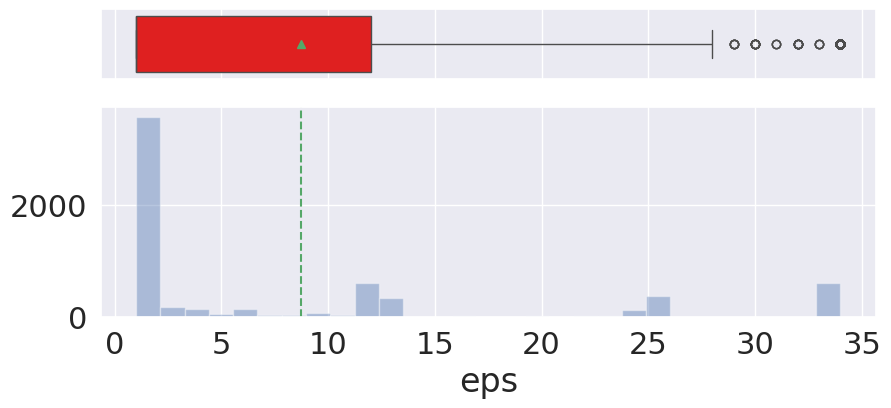

In [ ]:
histogram_boxplot(df.eps , figsize=(10,4))

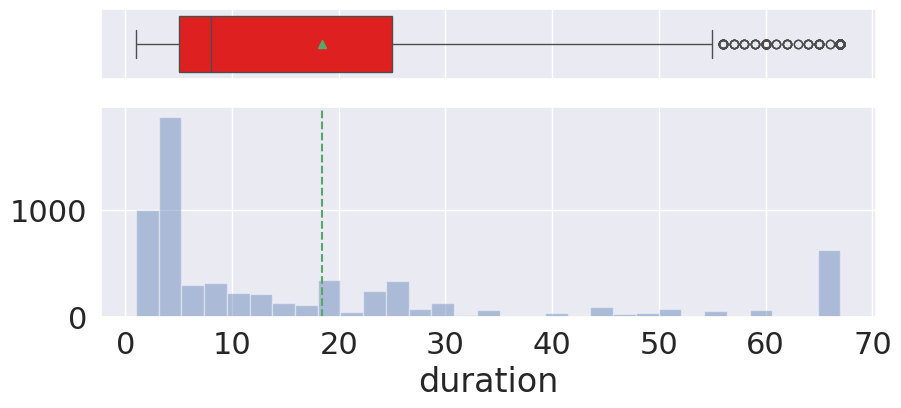

In [ ]:
histogram_boxplot(df.duration, figsize=(10,4))

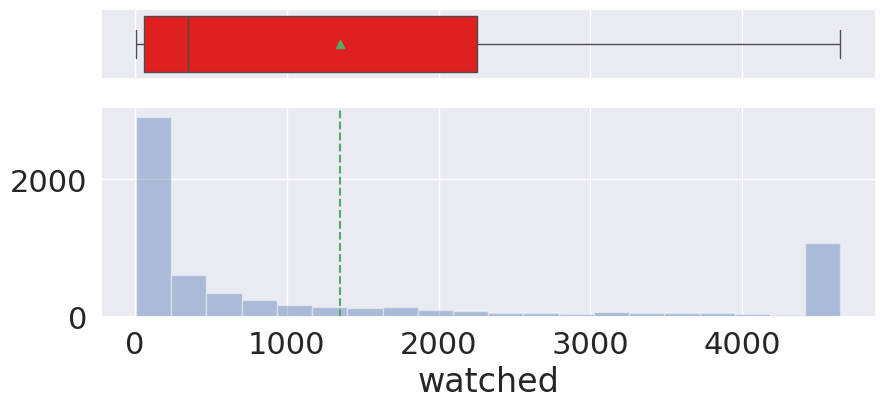

In [ ]:
histogram_boxplot(df.watched, figsize=(10,4))

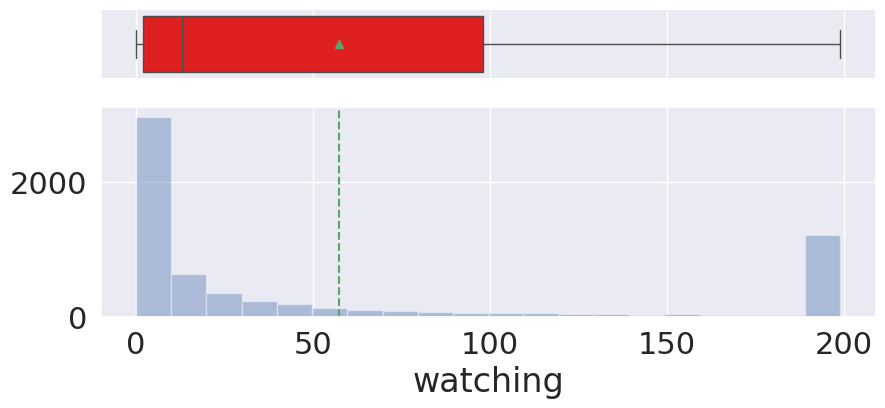

In [ ]:
histogram_boxplot(df.watching, figsize=(10,4))

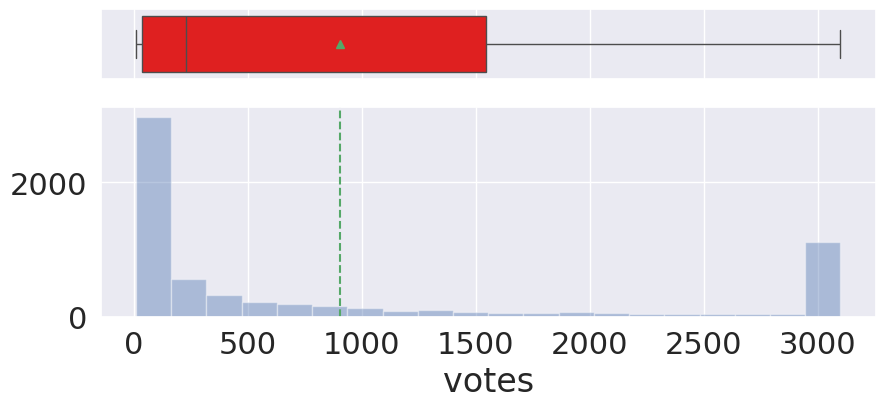

In [ ]:
histogram_boxplot(df.votes, figsize=(10,4))

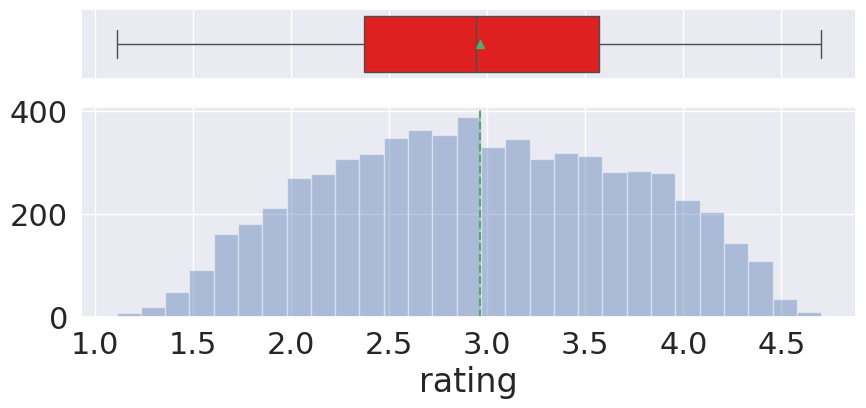

In [ ]:
histogram_boxplot(df.rating, figsize=(10,4))

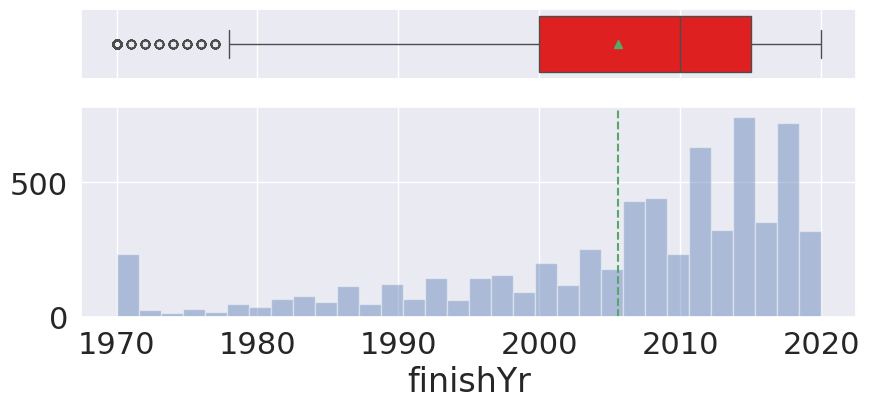

In [ ]:
histogram_boxplot(df.finishYr, figsize=(10,4))

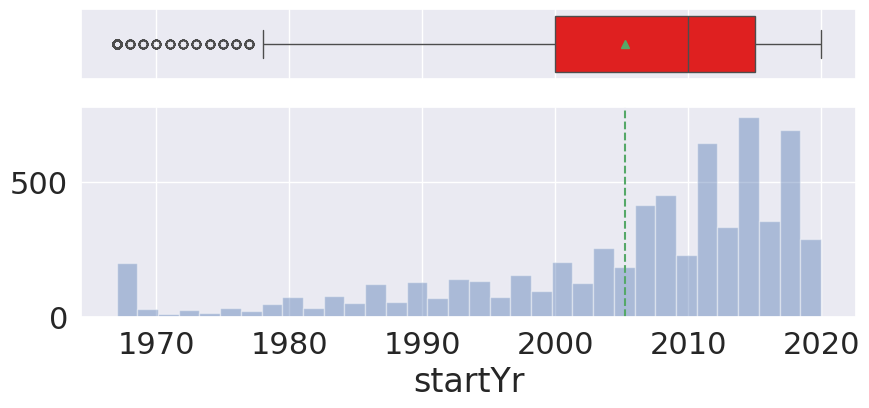

In [ ]:
histogram_boxplot(df.startYr, figsize=(10,4))

#### Votes

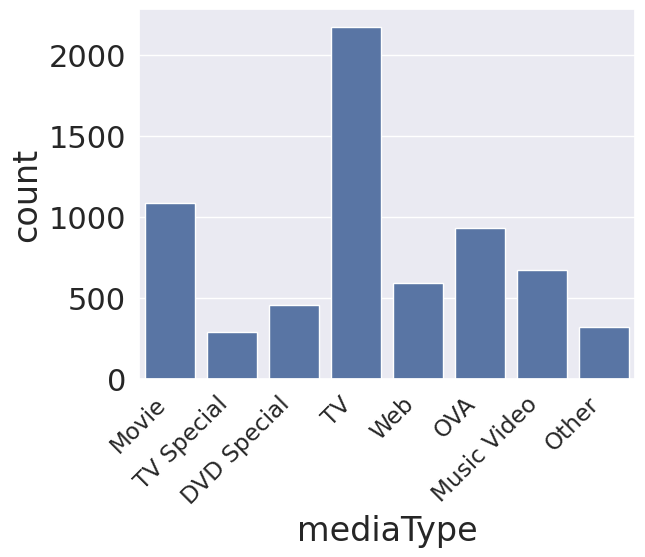

In [ ]:
# MediaType

plot = sns.countplot(df, x='mediaType')

# Get x-axis tick locations and labels
xtick_loc = plot.get_xticks()
xtick_labels = plot.get_xticklabels()

# Set the x-axis ticks
plot.set_xticks(ticks = xtick_loc, labels = xtick_labels, rotation = 45, ha = 'right', fontsize='x-small')

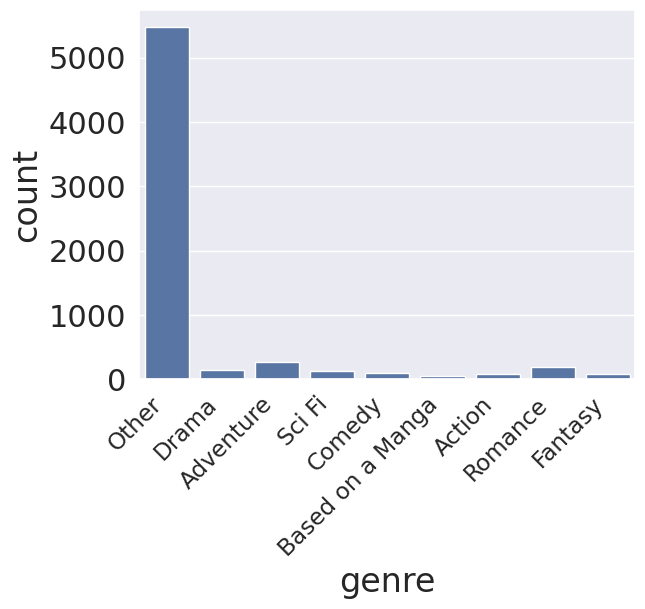

In [ ]:
plot = sns.countplot(df, x='genre')

# Get x-axis tick locations and labels
xtick_loc = plot.get_xticks()
xtick_labels = plot.get_xticklabels()

# Set the x-axis ticks
plot.set_xticks(ticks = xtick_loc, labels = xtick_labels, rotation = 45, ha = 'right', fontsize='x-small')


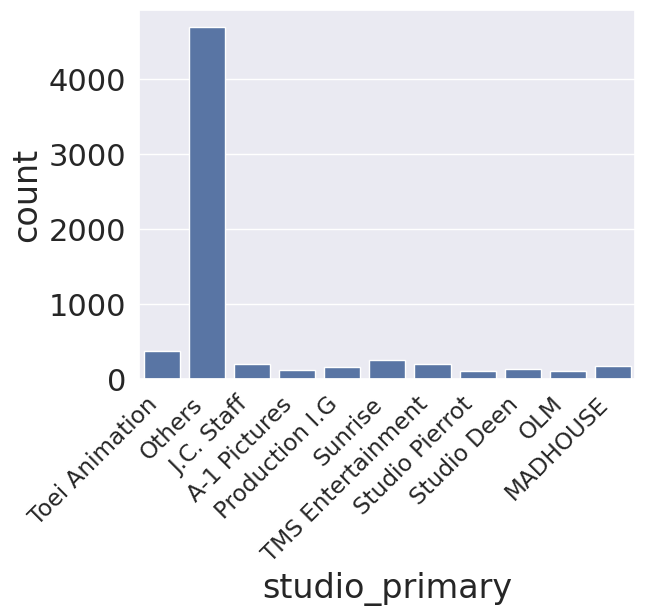

In [ ]:
plot = sns.countplot(df, x='studio_primary')

# Get x-axis tick locations and labels
xtick_loc = plot.get_xticks()
xtick_labels = plot.get_xticklabels()

# Set the x-axis ticks
plot.set_xticks(ticks = xtick_loc, labels = xtick_labels, rotation = 45, ha = 'right', fontsize='x-small')

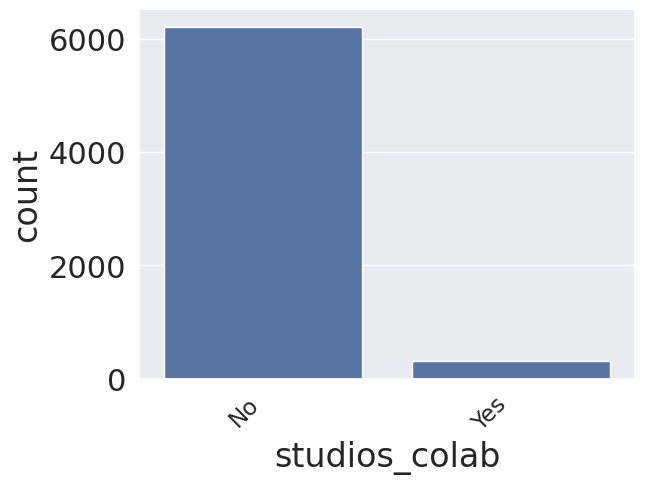

In [ ]:
plot = sns.countplot(df, x='studios_colab')

# Get x-axis tick locations and labels
xtick_loc = plot.get_xticks()
xtick_labels = plot.get_xticklabels()

# Set the x-axis ticks
plot.set_xticks(ticks = xtick_loc, labels = xtick_labels, rotation = 45, ha = 'right', fontsize='x-small')

## Multivariate

<Axes: xlabel='eps', ylabel='rating'>

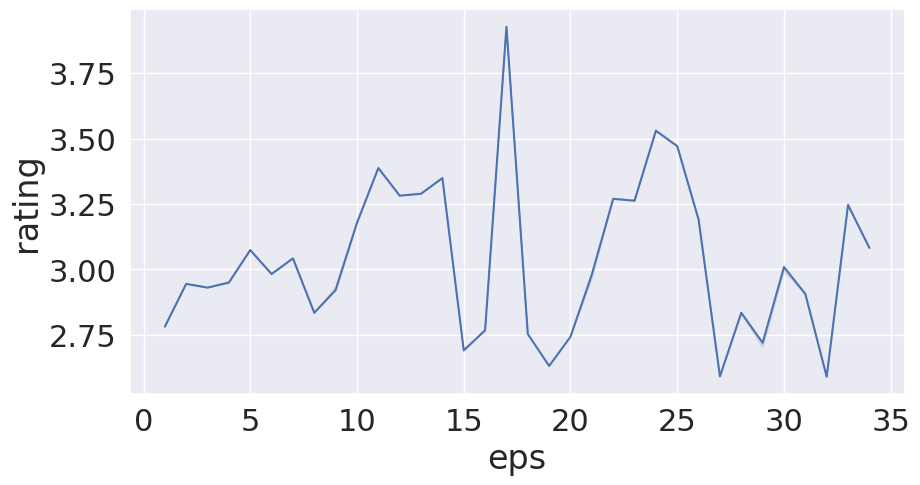

In [ ]:
# it is the graph between votes vs rating
plt.figure(figsize=(10,5))
sns.lineplot(x='eps',y='rating',data=df,ci=False)

15-25 eps are enough to go with . as the eps beyond 25 increases,the ratings decreases. may be the capacity of the people be 15-25 and beyond that they may be getting bored

<Axes: xlabel='votes', ylabel='rating'>

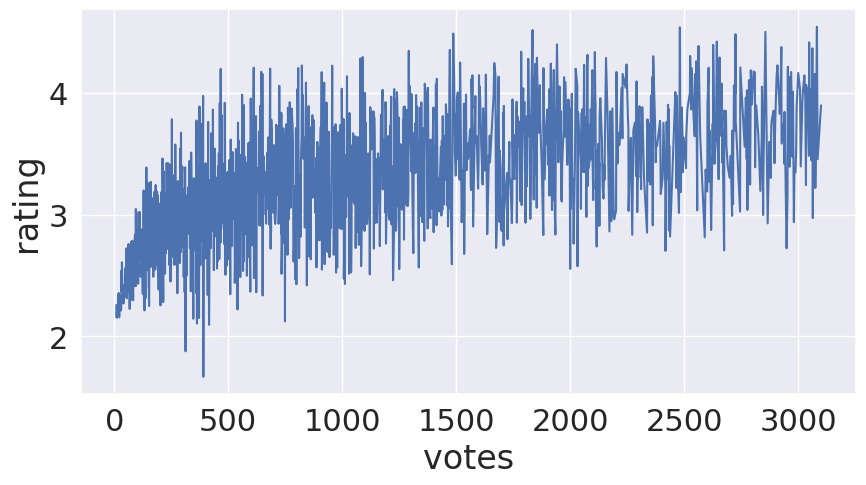

In [ ]:
# it is the graph between votes vs rating
plt.figure(figsize=(10,5))
sns.lineplot(x='votes',y='rating',data=df,ci=False)

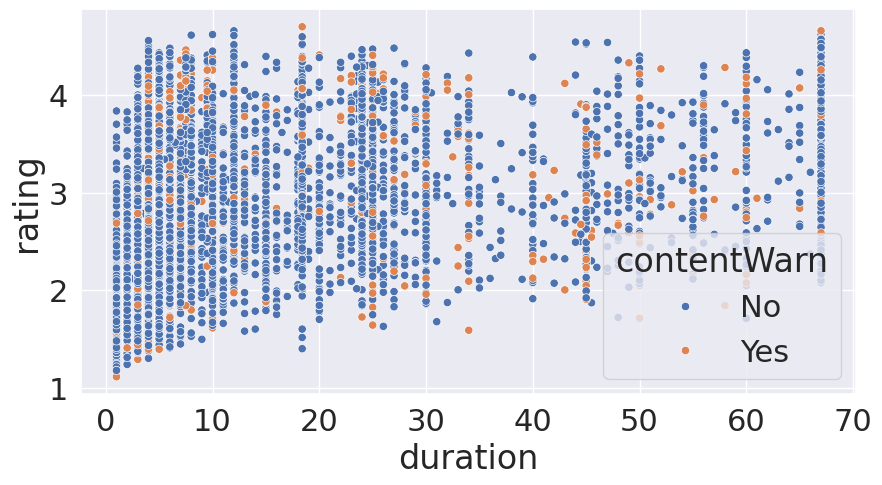

In [ ]:

## it is the graph of losses vs Age vs Gender
plt.figure(figsize=(10,5))
sns.scatterplot(y='rating',x='duration',hue='contentWarn',data=df);

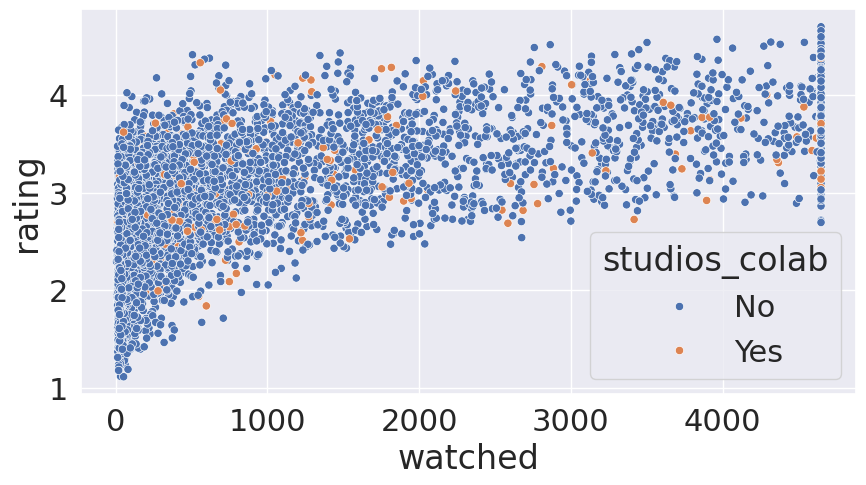

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(y='rating',x='watched',hue='studios_colab',data=df);

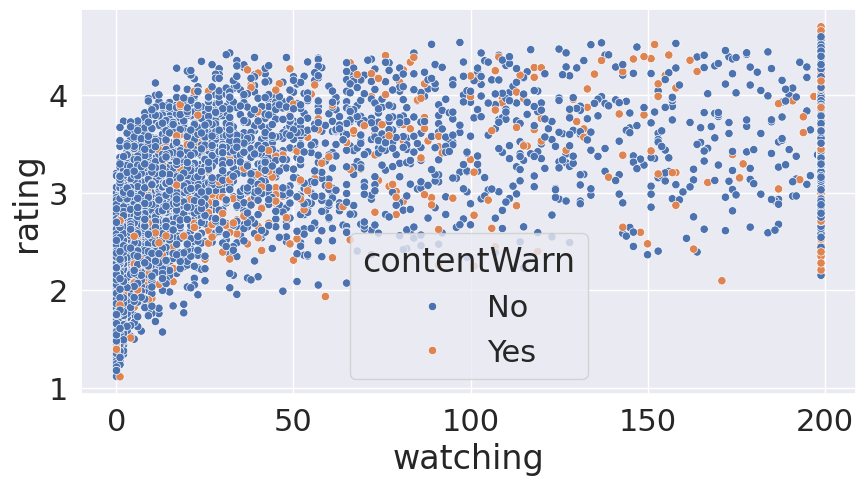

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(y='rating',x='watching',hue='contentWarn',data=df);

<Axes: xlabel='duration', ylabel='rating'>

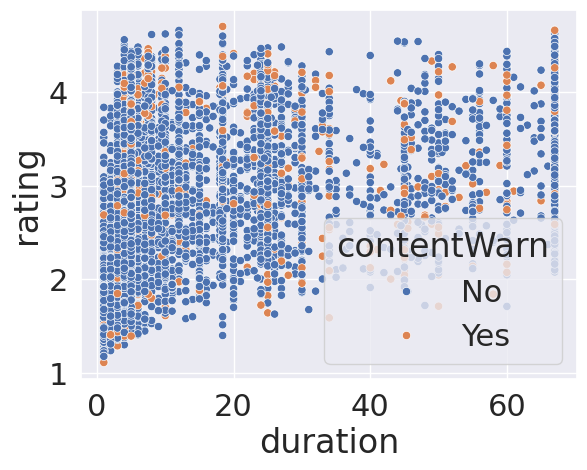

In [ ]:
# Duration vs Ratings

sns.scatterplot(y='rating',x ='duration',  data = df, hue = 'contentWarn')

<Axes: xlabel='watched', ylabel='rating'>

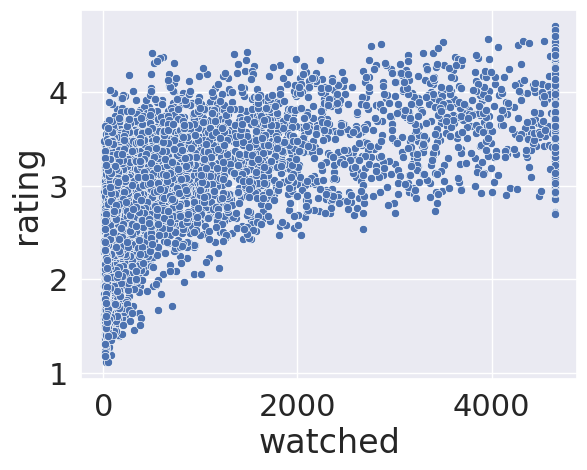

In [ ]:
# watched vs Ratings

sns.scatterplot(y='rating',x ='watched',  data = df)

<Axes: xlabel='watching', ylabel='rating'>

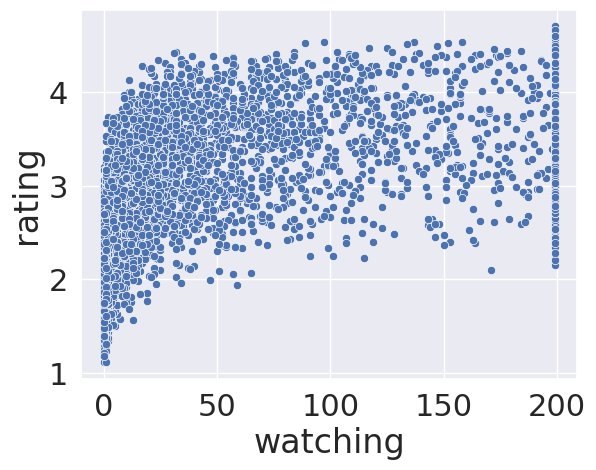

In [ ]:
# watched vs Ratings

sns.scatterplot(y='rating',x ='watching',  data = df)

#  Correlation:



In [ ]:
corelation = df.corr()
corelation

,eps,duration,startYr,finishYr,watched,watching,rating,votes
eps,1.000,-0.323,-0.139,-0.121,0.142,0.364,0.196,0.167
duration,-0.323,1.000,-0.183,-0.195,0.113,-0.097,0.343,0.088
startYr,-0.139,-0.183,1.000,0.998,0.159,0.253,0.152,0.174
finishYr,-0.121,-0.195,0.998,1.000,0.159,0.259,0.151,0.175
watched,0.142,0.113,0.159,0.159,1.000,0.790,0.736,0.991
watching,0.364,-0.097,0.253,0.259,0.790,1.000,0.643,0.826
rating,0.196,0.343,0.152,0.151,0.736,0.643,1.000,0.727
votes,0.167,0.088,0.174,0.175,0.991,0.826,0.727,1.000


<Axes: >

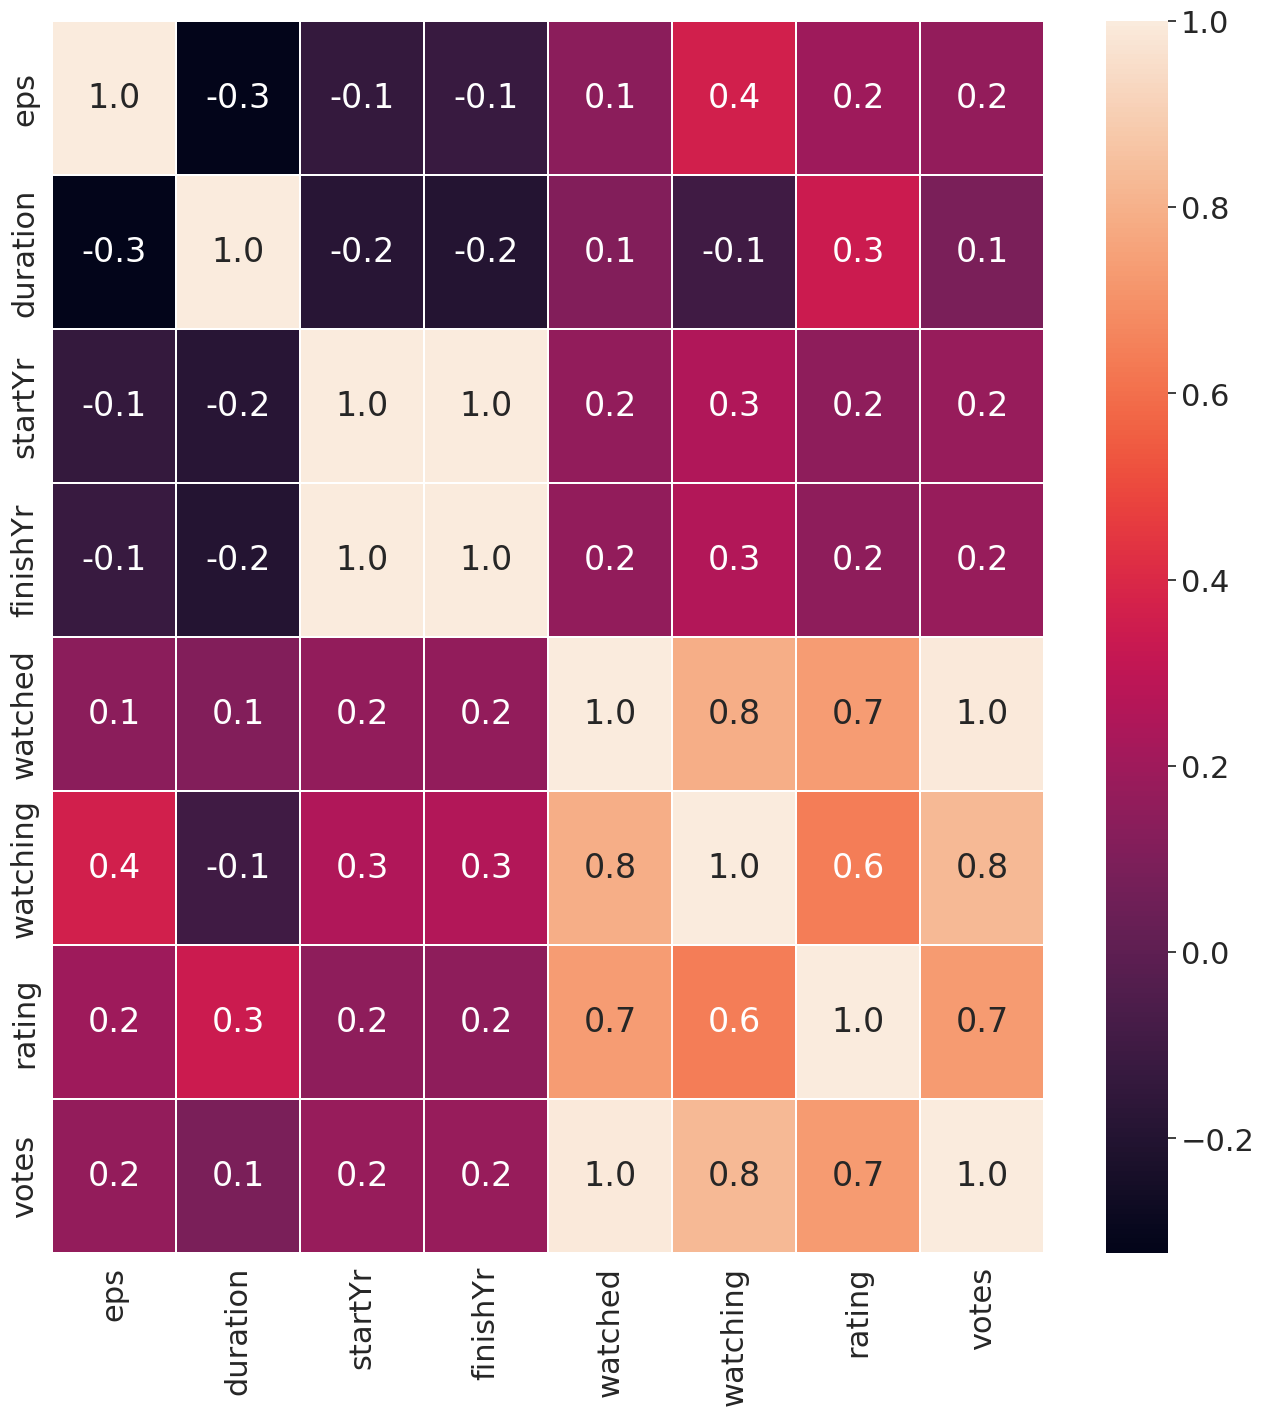

In [ ]:
f,ax = plt.subplots(figsize=(16,16))
sns.heatmap(df.corr(),annot = True, linewidths=.3,fmt='1.0001f',ax =ax)

### Feature Engineering:

* Ratio variables

* Interaction variables (creating flags)

In [ ]:
x= df.drop('rating', axis=1)
y = df.rating

print(x.head())
print(y.head())



     mediaType  eps  duration  startYr  finishYr contentWarn  watched  \
0        Movie    1    67.000     2015      2015          No     4649   
1        Movie    1     5.000     2008      2008          No       10   
2   TV Special    1    46.000     2014      2014          No     1630   
3        Movie    1    67.000     1984      1984          No     4649   
4  DVD Special    1     4.000     2019      2019          No      346   

   watching    votes  studio_primary studios_colab  genre  
0        86 3100.000  Toei Animation            No  Other  
1         0   10.000          Others            No  Other  
2        16 1103.000          Others            No  Other  
3       184 3100.000          Others            No  Drama  
4         8  234.000          Others            No  Other  
0   3.979
1   2.120
2   3.758
3   4.444
4   2.494
Name: rating, dtype: float64


In [ ]:
print(x.shape)
print(y.shape)

(6523, 12)
(6523,)


## Creating dummies

In [ ]:
x= pd.get_dummies(x,columns = ['mediaType','contentWarn','studio_primary','studios_colab','genre'],drop_first=True)
print(x.head())
print(x.shape)


   eps  duration  startYr  finishYr  watched  watching    votes  \
0    1    67.000     2015      2015     4649        86 3100.000   
1    1     5.000     2008      2008       10         0   10.000   
2    1    46.000     2014      2014     1630        16 1103.000   
3    1    67.000     1984      1984     4649       184 3100.000   
4    1     4.000     2019      2019      346         8  234.000   

   mediaType_Movie  mediaType_Music Video  mediaType_OVA  ...  \
0                1                      0              0  ...   
1                1                      0              0  ...   
2                0                      0              0  ...   
3                1                      0              0  ...   
4                0                      0              0  ...   

   studio_primary_Toei Animation  studios_colab_Yes  genre_Adventure  \
0                              1                  0                0   
1                              0                  0           

## Moseling using sklearn

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size =0.3,random_state = 42)


In [ ]:
from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()
linearregression.fit(x_train,y_train)

LinearRegression()

In [ ]:
print("Intercept of the linear equation:", linearregression.intercept_)
print("\nCoefficients of linear equation are:", linearregression.coef_)

from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

pred = linearregression.predict(x_train)

# Here we get the Beta coefficents: β0(intercept) and β1....βn

Intercept of the linear equation: -10.791120995309297

Coefficients of linear equation are: [ 2.12640609e-02  1.26716143e-02  4.76657969e-02 -4.09469435e-02
  3.68425945e-04  3.01260140e-03 -2.79943656e-04 -2.16248147e-01
 -2.73443039e-01 -2.38210685e-01 -2.46525993e-01 -4.90394481e-01
 -1.32861855e-01 -4.41775675e-01 -1.56622514e-01 -1.22709469e-01
 -9.65110428e-02 -3.95116682e-01 -2.02797773e-01  9.43093081e-02
 -8.96083154e-02 -1.28878324e-01 -2.83256686e-03  1.05429825e-01
 -1.21297231e-01 -3.70892108e-02 -9.09194300e-02  1.24236926e-01
 -1.74451629e-01  2.43074947e-01  4.06705046e-02 -3.24406641e-02
  3.74560892e-02 -4.73439101e-02]


In [ ]:

# function to compute adjusted R- Squared
def adj_r2_score(predictors,targets,predictions):
  r2 = r2_score(targets,predictions)
  n= predictors.shape[0]
  k = predictors.shape[1]
  return 1-((1-r2)*(n-1)/(n-k-1))

# function to compute MAPE
def mape_score(targets,predictions):
  return np.mean(np.abs(targets-predictions)/targets)*100

#function to compute different metrics to check performance of regression model
def model_performance_regression(model,predictors,target):
  # predicting using independent variables
  pred = model.predict(predictors)

  r2 = r2_score(target,pred) # to compute R squared
  adjr2 = adj_r2_score(predictors,target,pred) # to compute adjusted R squared
  rmse = np.sqrt(mean_squared_error(target,pred)) # to compute RMSE
  mae = mean_absolute_error(target,pred) # to compute MAE
  mape = mape_score(target,pred) # to compute MAPE (Mean Absolute Percentage Error)

  # Creating dataframe metrics
  df_perf = pd.DataFrame(
      {
          "RMSE": rmse,
          "MAE" : mae,
          "R-Squared" : r2,
          "Adj. R Squared": adjr2,
          "MAPE": mape,
      },
      index =[0],
  )
  return df_perf



In [ ]:
# Checking model performance on train set
print ("Training Performance\n")
sklmodel_train_perf = model_performance_regression(linearregression,x_train,y_train)
sklmodel_train_perf



Training Performance



,RMSE,MAE,R-Squared,Adj. R Squared,MAPE
0,0.397,0.327,0.723,0.721,12.268


In [ ]:
# Checking model performance on train set
print ("Test Performance\n")
sklmodel_test_perf = model_performance_regression(linearregression,x_test,y_test)
sklmodel_test_perf

Test Performance



,RMSE,MAE,R-Squared,Adj. R Squared,MAPE
0,0.408,0.333,0.722,0.717,12.748


# Add stat Model

In [ ]:
# Lets us build linear regression model using statsmodel

x = sm.add_constant(x)
print(x.shape)
print(y.shape)
x_train1, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

olsmod0 = sm.OLS(y_train, x_train1)
olsres0 = olsmod0.fit()
print(olsres0.summary())

(6523, 35)
(6523,)
                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     347.8
Date:                Wed, 28 Feb 2024   Prob (F-statistic):               0.00
Time:                        08:14:15   Log-Likelihood:                -2262.3
No. Observations:                4566   AIC:                             4595.
Df Residuals:                    4531   BIC:                             4820.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [ ]:

x = sm.add_constant(x) # add constant column for β0
X_train1,x_test1,y_train1,y_test1 = train_test_split(x,y,test_size =0.3,random_state=42)

olsmod0 = sm.OLS(y_train1,x_train1)
olsres0 = olsmod0.fit()
print(olsres0.summary())

# Here we train the model using X train and Y train datasets by applying OLS method

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     347.8
Date:                Wed, 28 Feb 2024   Prob (F-statistic):               0.00
Time:                        08:14:15   Log-Likelihood:                -2262.3
No. Observations:                4566   AIC:                             4595.
Df Residuals:                    4531   BIC:                             4820.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [ ]:
# Checking for Multicolinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series([variance_inflation_factor(x.values,i) for i in range(x.shape[1])],index =x.columns)
print ("Series before feature selection: \n\n{}\n".format(vif_series1))

Series before feature selection: 

const                              44111.104
eps                                    3.824
duration                               2.726
startYr                              320.872
finishYr                             319.969
watched                               65.510
watching                               5.345
votes                                 76.248
mediaType_Movie                        4.295
mediaType_Music Video                  2.386
mediaType_OVA                          3.157
mediaType_Other                        1.664
mediaType_TV                           7.065
mediaType_TV Special                   1.801
mediaType_Web                          2.226
contentWarn_Yes                        1.116
studio_primary_J.C. Staff              2.567
studio_primary_MADHOUSE                2.411
studio_primary_OLM                     1.950
studio_primary_Others                 11.600
studio_primary_Production I.G          2.292
studio_primary_Studi

In [ ]:
df.columns

Index(['mediaType', 'eps', 'duration', 'startYr', 'finishYr', 'contentWarn',
       'watched', 'watching', 'rating', 'votes', 'studio_primary',
       'studios_colab', 'genre'],
      dtype='object')

In [ ]:
# We drop the one with the highest vif values and check the VIF again
x_train2 = x_train1.drop('startYr', axis=1)
vif_series2 = pd.Series([variance_inflation_factor(x_train2.values,i) for i in range(x_train2.shape[1])],index =x_train2.columns)
print ("Series before feature selection: \n\n{}\n".format(vif_series2))

Series before feature selection: 

const                              38463.895
eps                                    3.549
duration                               2.666
finishYr                               1.549
watched                               64.433
watching                               5.231
votes                                 75.257
mediaType_Movie                        4.215
mediaType_Music Video                  2.376
mediaType_OVA                          3.075
mediaType_Other                        1.661
mediaType_TV                           6.880
mediaType_TV Special                   1.796
mediaType_Web                          2.152
contentWarn_Yes                        1.118
studio_primary_J.C. Staff              2.535
studio_primary_MADHOUSE                2.243
studio_primary_OLM                     1.921
studio_primary_Others                 10.860
studio_primary_Production I.G          2.215
studio_primary_Studio Deen             2.007
studio_primary_Studi


### Observations
* We can see that by removing startYr , the VIF comes pretty much in control - this suggests that the variable startYr had a big influence on the rest of the variables

In [ ]:

# We drop the one with the highest vif values and check the VIF again
x_train3 = x_train2.drop('votes',axis =1)
vif_series3 = pd.Series([variance_inflation_factor(x_train3.values,i) for i in range(x_train3.shape[1])],index =x_train3.columns)
print ("Series before feature selection: \n\n{}\n".format(vif_series3))


Series before feature selection: 

const                              38462.797
eps                                    3.507
duration                               2.666
finishYr                               1.549
watched                                3.220
watching                               4.383
mediaType_Movie                        4.210
mediaType_Music Video                  2.374
mediaType_OVA                          3.075
mediaType_Other                        1.661
mediaType_TV                           6.782
mediaType_TV Special                   1.796
mediaType_Web                          2.150
contentWarn_Yes                        1.118
studio_primary_J.C. Staff              2.535
studio_primary_MADHOUSE                2.243
studio_primary_OLM                     1.921
studio_primary_Others                 10.854
studio_primary_Production I.G          2.214
studio_primary_Studio Deen             2.007
studio_primary_Studio Pierrot          1.904
studio_primary_Sunri

In [ ]:
x_train4 = x_train3.drop('genre_Other',axis =1)
vif_series4 = pd.Series([variance_inflation_factor(x_train4.values,i) for i in range(x_train4.shape[1])],index =x_train4.columns)
print ("Series before feature selection: \n\n{}\n".format(vif_series4))


Series before feature selection: 

const                              38425.875
eps                                    3.506
duration                               2.637
finishYr                               1.548
watched                                3.220
watching                               4.382
mediaType_Movie                        4.199
mediaType_Music Video                  2.374
mediaType_OVA                          3.074
mediaType_Other                        1.661
mediaType_TV                           6.780
mediaType_TV Special                   1.795
mediaType_Web                          2.150
contentWarn_Yes                        1.116
studio_primary_J.C. Staff              2.535
studio_primary_MADHOUSE                2.242
studio_primary_OLM                     1.921
studio_primary_Others                 10.854
studio_primary_Production I.G          2.214
studio_primary_Studio Deen             2.007
studio_primary_Studio Pierrot          1.904
studio_primary_Sunri

In [ ]:
x_train5 = x_train4.drop('studio_primary_Others',axis =1)
vif_series5= pd.Series([variance_inflation_factor(x_train5.values,i) for i in range(x_train5.shape[1])],index =x_train5.columns)
print ("Series before feature selection: \n\n{}\n".format(vif_series5))


Series before feature selection: 

const                              38239.652
eps                                    3.505
duration                               2.637
finishYr                               1.546
watched                                3.211
watching                               4.374
mediaType_Movie                        4.194
mediaType_Music Video                  2.370
mediaType_OVA                          3.069
mediaType_Other                        1.660
mediaType_TV                           6.778
mediaType_TV Special                   1.794
mediaType_Web                          2.147
contentWarn_Yes                        1.115
studio_primary_J.C. Staff              1.049
studio_primary_MADHOUSE                1.047
studio_primary_OLM                     1.043
studio_primary_Production I.G          1.054
studio_primary_Studio Deen             1.031
studio_primary_Studio Pierrot          1.043
studio_primary_Sunrise                 1.075
studio_primary_TMS E

In [ ]:
x_train6 = x_train5.drop('mediaType_TV',axis =1)
vif_series6 = pd.Series([variance_inflation_factor(x_train6.values,i) for i in range(x_train6.shape[1])],index =x_train6.columns)
print ("Series before feature selection: \n\n{}\n".format(vif_series6))


Series before feature selection: 

const                              37840.893
eps                                    2.491
duration                               2.635
finishYr                               1.534
watched                                3.168
watching                               3.925
mediaType_Movie                        3.372
mediaType_Music Video                  1.866
mediaType_OVA                          2.218
mediaType_Other                        1.361
mediaType_TV Special                   1.551
mediaType_Web                          1.481
contentWarn_Yes                        1.115
studio_primary_J.C. Staff              1.049
studio_primary_MADHOUSE                1.045
studio_primary_OLM                     1.043
studio_primary_Production I.G          1.052
studio_primary_Studio Deen             1.030
studio_primary_Studio Pierrot          1.043
studio_primary_Sunrise                 1.073
studio_primary_TMS Entertainment       1.066
studio_primary_Toei 

### Observations
* After removing the second variable, we see that VIF goes below 5 for all the variables

In [ ]:
# Build model again

olsmod1 = sm.OLS(y_train1,x_train6)
olsres1 = olsmod1.fit()
print(olsres1.summary())

# We build the model again with low multicolinearity amongst the independent variables

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     372.0
Date:                Wed, 28 Feb 2024   Prob (F-statistic):               0.00
Time:                        08:14:18   Log-Likelihood:                -2413.7
No. Observations:                4566   AIC:                             4887.
Df Residuals:                    4536   BIC:                             5080.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

### Observations:
* We see that P>|t| value is 0.602 for Number of Vehicles
* For test of significance, H0 is x is insignificant towards y and the Ha becomes x is significant towards y.
* As the P value is greater than 0.05, we fail to reject H0 and hence we drop this variable in the next step.

In [ ]:
x_train7 = x_train6.drop('genre_Sci Fi',axis =1)

olsmod1 = sm.OLS(y_train1,x_train7)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     385.3
Date:                Wed, 28 Feb 2024   Prob (F-statistic):               0.00
Time:                        08:14:18   Log-Likelihood:                -2413.9
No. Observations:                4566   AIC:                             4886.
Df Residuals:                    4537   BIC:                             5072.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [ ]:
x_train8 = x_train7.drop('mediaType_OVA',axis =1)

olsmod1 = sm.OLS(y_train1,x_train8)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     399.6
Date:                Wed, 28 Feb 2024   Prob (F-statistic):               0.00
Time:                        08:14:18   Log-Likelihood:                -2414.2
No. Observations:                4566   AIC:                             4884.
Df Residuals:                    4538   BIC:                             5064.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [ ]:
x_train9 = x_train8.drop('mediaType_Movie',axis =1)

olsmod1 = sm.OLS(y_train1,x_train9)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     414.9
Date:                Wed, 28 Feb 2024   Prob (F-statistic):               0.00
Time:                        08:14:18   Log-Likelihood:                -2414.7
No. Observations:                4566   AIC:                             4883.
Df Residuals:                    4539   BIC:                             5057.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [ ]:
x_train10= x_train9.drop('mediaType_Other',axis =1)

olsmod1 = sm.OLS(y_train1,x_train10)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     431.6
Date:                Wed, 28 Feb 2024   Prob (F-statistic):               0.00
Time:                        08:14:18   Log-Likelihood:                -2414.8
No. Observations:                4566   AIC:                             4882.
Df Residuals:                    4540   BIC:                             5049.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [ ]:
x_train11= x_train10.drop('genre_Comedy',axis =1)

olsmod1 = sm.OLS(y_train1,x_train11)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     449.5
Date:                Wed, 28 Feb 2024   Prob (F-statistic):               0.00
Time:                        08:14:18   Log-Likelihood:                -2415.3
No. Observations:                4566   AIC:                             4881.
Df Residuals:                    4541   BIC:                             5041.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [ ]:
x_train12= x_train11.drop('studio_primary_Studio Pierrot',axis =1)

olsmod1 = sm.OLS(y_train1,x_train12)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     468.8
Date:                Wed, 28 Feb 2024   Prob (F-statistic):               0.00
Time:                        08:14:18   Log-Likelihood:                -2416.5
No. Observations:                4566   AIC:                             4881.
Df Residuals:                    4542   BIC:                             5035.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [ ]:
x_train13= x_train12.drop('studios_colab_Yes',axis =1)

olsmod1 = sm.OLS(y_train1,x_train13)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     489.8
Date:                Wed, 28 Feb 2024   Prob (F-statistic):               0.00
Time:                        08:14:18   Log-Likelihood:                -2418.1
No. Observations:                4566   AIC:                             4882.
Df Residuals:                    4543   BIC:                             5030.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [ ]:
x_train14= x_train13.drop('genre_Romance',axis =1)

olsmod1 = sm.OLS(y_train1,x_train14)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     512.7
Date:                Wed, 28 Feb 2024   Prob (F-statistic):               0.00
Time:                        08:14:18   Log-Likelihood:                -2419.7
No. Observations:                4566   AIC:                             4883.
Df Residuals:                    4544   BIC:                             5025.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

### Observations:
* We see that P>|t| value is 0.602 for Number of Vehicles
* For test of significance, H0 is x is insignificant towards y and the Ha becomes x is significant towards y.
* As the P value is greater than 0.05, we fail to reject H0 and hence we drop this variable in the next step.

In [ ]:
print ("Training Performance\n")
statmodel_train_perf = model_performance_regression(olsres1,x_train14,y_train1)
statmodel_train_perf
# We check the performance of the OLS model on Train dataset
# R2 is a calculate the error

Training Performance



,RMSE,MAE,R-Squared,Adj. R Squared,MAPE
0,0.411,0.337,0.703,0.702,12.677


In [ ]:
x_test2 = x_test1[x_train14.columns]
x_test2.head()

,const,eps,duration,finishYr,watched,watching,mediaType_Music Video,mediaType_TV Special,mediaType_Web,contentWarn_Yes,...,studio_primary_OLM,studio_primary_Production I.G,studio_primary_Studio Deen,studio_primary_Sunrise,studio_primary_TMS Entertainment,studio_primary_Toei Animation,genre_Adventure,genre_Based on a Manga,genre_Drama,genre_Fantasy
5193,1.000,1,24.000,2018,2437,91,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
5238,1.000,1,4.000,1993,103,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6121,1.000,1,28.000,2017,4649,111,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2304,1.000,3,30.000,1989,101,4,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4922,1.000,1,67.000,1991,285,11,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print ("Test Performance\n")


statmodel_test_perf = model_performance_regression(olsres1,x_test2,y_test1)
statmodel_test_perf


Test Performance



,RMSE,MAE,R-Squared,Adj. R Squared,MAPE
0,0.422,0.345,0.703,0.699,13.216


# Assumptions check:

In [ ]:
residual = olsres1.resid
np.mean(residual)

# Calculate the errors

-4.592325935499432e-14

In [ ]:
fitted = olsres1.fittedvalues # predicted values

## check for linearity

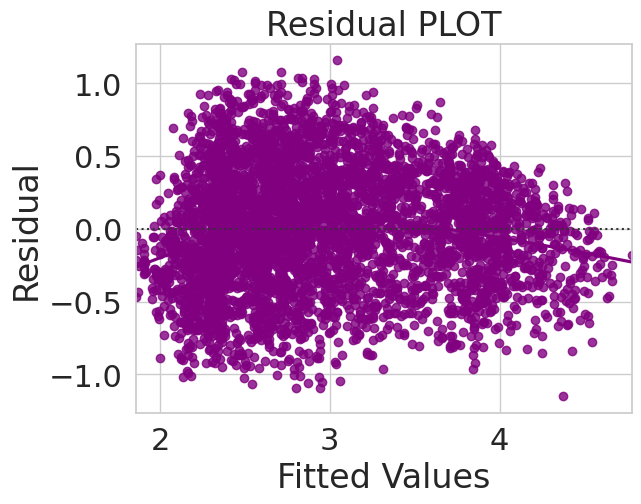

In [ ]:
sns.set_style("whitegrid")
sns.residplot(x=fitted,y=residual,color ='purple',lowess =True)
plt.xlabel ("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

### Observations:
* The rsiduals do not form a curve liike pattern
* Hence we can conclude that the data is linear

### Test for normality

<Axes: ylabel='Count'>

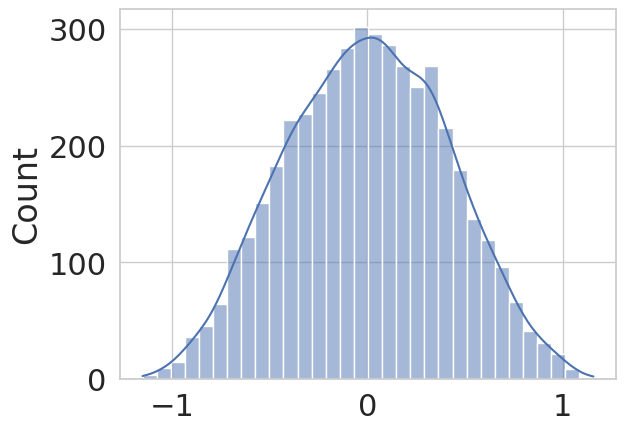

In [ ]:
sns.histplot(residual,kde =True)

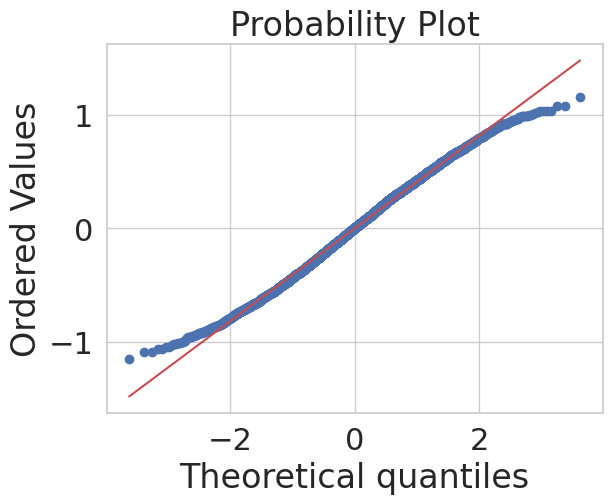

In [ ]:
import pylab
import scipy.stats as stats
stats.probplot(residual,dist='norm',plot=pylab)
plt.show()


### Observations:
* Based on the Histogram and the QQ plot above, we can conclude that the errors are normally distributed



### Test for Homoscedasticity

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residual,x_train14)
lzip(name,test)

[('F statistic', 1.014963932793443), ('p-value', 0.3620100874881198)]

### Observations:
* Here, H0: Data is Homoscedastic and Ha: Data is Hetroscedastic
* As P value is > 0.05, we conclude that the data is Homoscedastic

In [ ]:
x_train14.columns

Index(['const', 'eps', 'duration', 'finishYr', 'watched', 'watching',
       'mediaType_Music Video', 'mediaType_TV Special', 'mediaType_Web',
       'contentWarn_Yes', 'studio_primary_J.C. Staff',
       'studio_primary_MADHOUSE', 'studio_primary_OLM',
       'studio_primary_Production I.G', 'studio_primary_Studio Deen',
       'studio_primary_Sunrise', 'studio_primary_TMS Entertainment',
       'studio_primary_Toei Animation', 'genre_Adventure',
       'genre_Based on a Manga', 'genre_Drama', 'genre_Fantasy'],
      dtype='object')

In [ ]:
x_test_final = x_test1[x_train14.columns]

In [ ]:
x_test_final.head()

,const,eps,duration,finishYr,watched,watching,mediaType_Music Video,mediaType_TV Special,mediaType_Web,contentWarn_Yes,...,studio_primary_OLM,studio_primary_Production I.G,studio_primary_Studio Deen,studio_primary_Sunrise,studio_primary_TMS Entertainment,studio_primary_Toei Animation,genre_Adventure,genre_Based on a Manga,genre_Drama,genre_Fantasy
5193,1.000,1,24.000,2018,2437,91,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
5238,1.000,1,4.000,1993,103,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6121,1.000,1,28.000,2017,4649,111,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2304,1.000,3,30.000,1989,101,4,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4922,1.000,1,67.000,1991,285,11,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_pred = olsres1.predict(x_test_final)

In [ ]:
print ("Final Train Performance\n")
statmodel_train_perf = model_performance_regression(olsres1,x_test_final,y_test)
statmodel_train_perf

Final Train Performance



,RMSE,MAE,R-Squared,Adj. R Squared,MAPE
0,0.422,0.345,0.703,0.699,13.216


In [ ]:
print ("Final Test Performance\n")
statmodel_test_perf = model_performance_regression(olsres1,x_test_final,y_test)
statmodel_test_perf

Final Test Performance



,RMSE,MAE,R-Squared,Adj. R Squared,MAPE
0,0.422,0.345,0.703,0.699,13.216
